<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01081266/blob/main/A01081266TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maestría en Inteligencia Artificial Aplicada
Curso: Inteligencia Artificial y Aprendizaje Automático

Tecnológico de Monterrey

Prof Maria de la Paz Rico

Actividad de la Semana 8: Modelos lineales

Aurelio Antonio Lozano Rábago A01081266

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [18]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [19]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [20]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

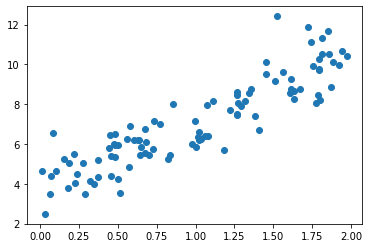

In [21]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [22]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [23]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [24]:
#X_fit[]

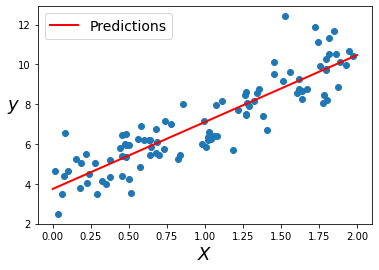

In [25]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [26]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [27]:
X_new.shape

(2, 1)

In [28]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [29]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [30]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [31]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

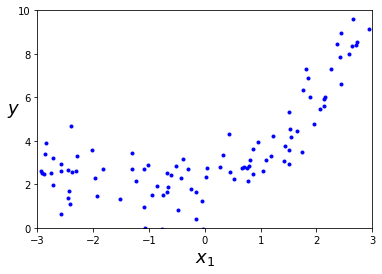

In [32]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [33]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [35]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [36]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [37]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [38]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

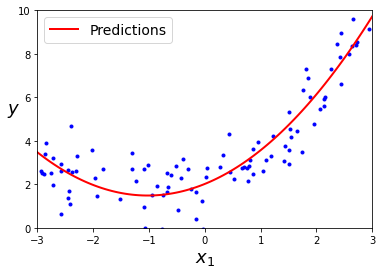

In [39]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [124]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
713,5.203777,25.946365
612,4.859392,36.102705
191,3.287707,48.589582
625,4.923699,46.097425
287,3.743679,38.030200
80,2.646551,47.510528
810,5.574643,34.770898
277,3.697192,38.320327
438,4.248094,41.109753
122,2.943189,38.825026


In [125]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [126]:
len(X)

1000

In [127]:

y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

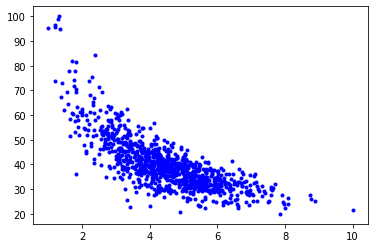

In [128]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), 

In [130]:
#lineal
from sklearn.linear_model import LinearRegression

ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR=ModeloLR.fit(X_train, y_train)

In [131]:
ModeloLR.coef_, ModeloLR.intercept_

(array([-5.91602323]), 66.44764675174278)

$\hat{y} =  -5.91X + 66.44$

su visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


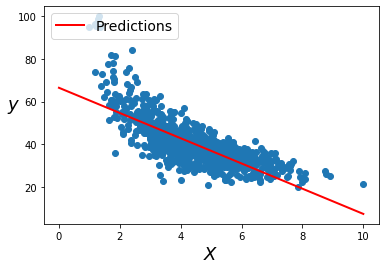

In [132]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloLR.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

sus errores y r cuadrada.

In [143]:
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score

y_trainMean = np.mean(y_train)

y_predTrainLR = ModeloLR.predict(X_train)

SSE = (y_train-y_predTrainLR)**2
SSE=sum(SSE)

SST = (y_train-y_trainMean)**2
SST=sum(SST)

R2LR = sklearn.metrics.r2_score(y_train, y_predTrainLR)

print("Results for Train results)")
print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2LR)

Results for Train results)
sum of the square of errors= 39379.83830485658
sum of the total error? 91547.34455036442
R2 Error 0.5698418288561948


In [142]:
y_trainMean = np.mean(y_train)

y_predTestLR = ModeloLR.predict(X_test)

SSE = (y_test-y_predTestLR)**2
SSE=sum(SSE)

SST = (y_test-y_trainMean)**2
SST=sum(SST)

R2LR = sklearn.metrics.r2_score(y_test, y_predTestLR)

print("Results for Test results")
print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2LR)

Results for Test results)
sum of the square of errors = 7866.309259793896
sum of the total error = 20610.912083215255
R2 Error 0.6171440942171167


Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [161]:
#polinomial

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)

In [162]:
ModeloLR2 = LinearRegression(fit_intercept=True)
ModeloLR2.fit(X_poly, y_train)
ModeloLR2.coef_, ModeloLR2.intercept_

(array([-5.35362652e+01,  1.20217474e+01, -1.26914661e+00,  4.97329144e-02]),
 130.6014949605702)

The model estimates:

$\hat{y} =  -16.82X +1.17X^2 + 89.73$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


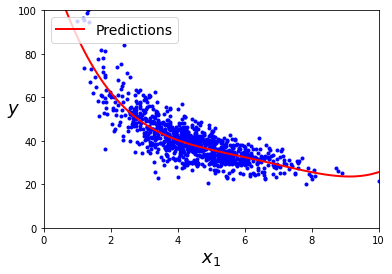

In [163]:
X_new2=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly2 = poly_features.transform(X_new2)
y_new2 = ModeloLR2.predict(X_new_poly2)
plt.plot(X, y, "b.")
plt.plot(X_new2, y_new2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0,100]);

In [164]:
y_trainMean = np.mean(y_train)
y_predTrainPoly = ModeloLR2.predict(X_poly)

SSE = (y_train-y_predTrainPoly)**2
SSE=SSE.sum()

SST = (y_train-y_trainMean)**2
SST=SST.sum()


R2Poly = sklearn.metrics.r2_score(y_train, y_predTrainPoly)
print("errors on training")
print("sum of the square of errors=", SSE)
print("sum of the total error_", SST)
print("R2 Error", R2Poly)

errors on training
sum of the square of errors= 29595.147514558666
sum of the total error_ 91547.34455036433
R2 Error 0.676723037026191


In [165]:
y_predTestPoly = ModeloLR2.predict(X_polyTst)

SSE = (y_test-y_predTestPoly)**2
SSE=SSE.sum()

SST = (y_test-y_trainMean)**2
SST=SST.sum()


R2Poly = sklearn.metrics.r2_score(y_test, y_predTestPoly)
print("errors on test")
print("sum of the square of errors=", SSE)
print("sum of the total error = ", SST)
print("R2 Error", R2Poly)

errors on test
sum of the square of errors= 4824.999893354483
sum of the total error_ 20610.91208321526
R2 Error 0.7651656394931838


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [54]:
#Ridge
from sklearn.linear_model import  Lasso, Ridge
ModeloRidge = Ridge(alpha=1)
ModeloRidge.fit(X_train, y_train)
ModeloRidge.coef_, ModeloRidge.intercept_


(array([-5.91205682]), 66.42988442427117)

$\hat{y} =  -5.91X  + 66.42$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


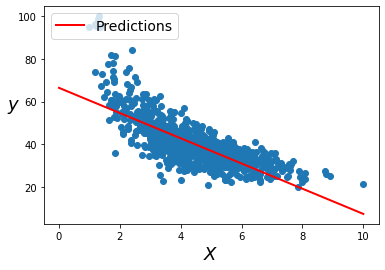

In [55]:
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloRidge.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [56]:
y_trainMean = np.mean(y_train)

y_predRidge = ModeloRidge.predict(X)

SSE = (y-y_predRidge)**2
SSE=sum(SSE)

SST = (y-y_trainMean)**2
SST=sum(SST)


R2Ridge = sklearn.metrics.r2_score(y, y_predRidge)

print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2Ridge)

sum of the square of errors= 47247.83892824078
sum of the total error? 112158.25663357973
R2 Error 0.5787031880211797


In [57]:
#Lasso
ModeloLasso = Lasso(alpha=1)
ModeloLasso.fit(X_train, y_train)
ModeloLasso.coef_, ModeloLasso.intercept_


(array([-5.34575577]), 63.89388605175991)

$\hat{y} =  -5.34X  + 63.89$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


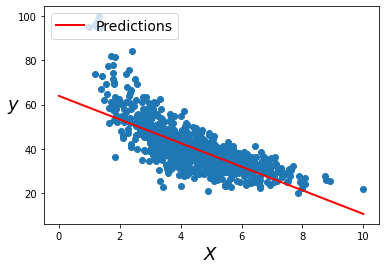

In [58]:
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloLasso.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [59]:
y_trainMean = np.mean(y_train)

y_predLasso = ModeloLasso.predict(X)

SSE = (y-y_predLasso)**2
SSE=sum(SSE)

SST = (y-y_trainMean)**2
SST=sum(SST)



R2Lasso = sklearn.metrics.r2_score(y, y_predLasso)

print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2Lasso)

sum of the square of errors= 48065.38233924024
sum of the total error? 112158.25663357973
R2 Error 0.5714133639673974


In [60]:
def mi_MAE(y_real, y_pred):
  MAE_val=np.abs(y_real-y_pred)
  MAE_val=np.mean(MAE_val)
  return MAE_val

MAE_LR=mi_MAE(y,y_predLR)
MAE_Pol=mi_MAE(y,y_predPoly)
MAE_Ridge=mi_MAE(y,y_predRidge)
MAE_Lasso=mi_MAE(y,y_predLasso)

print(MAE_LR)
print(MAE_Pol)
print(MAE_Ridge)
print(MAE_Lasso)

4.906615535625057
4.538765565228896
4.906245982353377
4.874997922220393


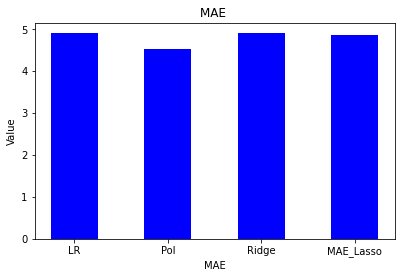

In [61]:
import matplotlib.pyplot as plt

data = {'LR':MAE_LR, 'Pol': MAE_Pol, 'Ridge': MAE_Ridge,
        'MAE_Lasso':MAE_Lasso}


Model = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 3))
MaeGraph = fig.add_axes([0,0,1,1])
 
MaeGraph.bar(Model,values, color ='b', width =.5)

plt.xlabel("MAE")
plt.ylabel("Value")
plt.title("MAE ")
plt.show()

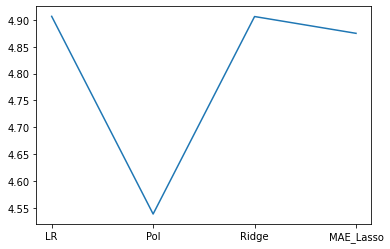

In [62]:
plt.plot(Model,values)

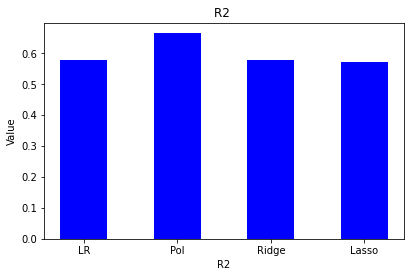

In [63]:
data2 = {'LR':R2LR, 'Pol': R2Poly, 'Ridge': R2Ridge,
        'Lasso':R2Lasso}

Model2 = list(data2.keys())
values2 = list(data2.values())

fig = plt.figure(figsize = (5, 3))
MaeGraph = fig.add_axes([0,0,1,1])
 
MaeGraph.bar(Model2,values2, color ='b', width =.5)

plt.xlabel("R2")
plt.ylabel("Value")
plt.title("R2 ")
plt.show()

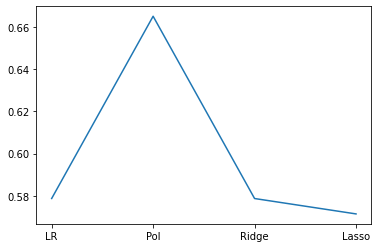

In [64]:
plt.plot(Model2,values2)

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [68]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


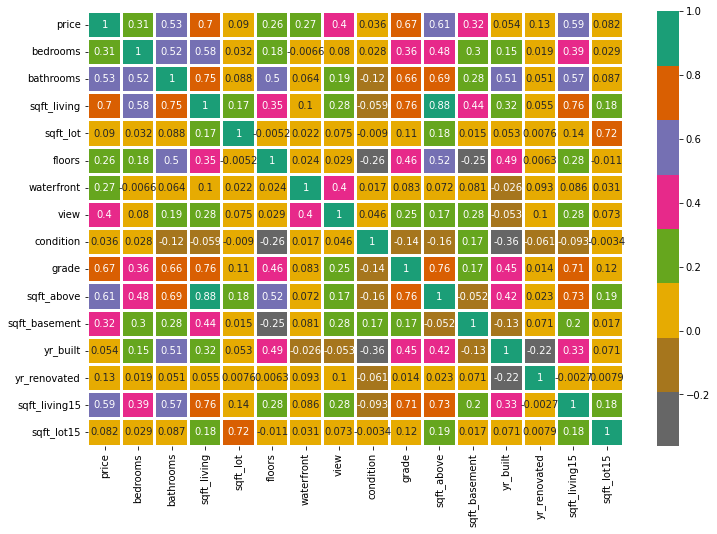

In [69]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [70]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [72]:
#tu codigo aquí

from sklearn.linear_model import LinearRegression

In [73]:
ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR=ModeloLR.fit(X_train, y_train)
ModeloLR.coef_, ModeloLR.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

$\hat{y} =  -38200x1 +41466x2 +107.99x3 + 0.0171x4 +31691x5 + 552691x6 + 412493x7 +21222x8 +119493x9 +47.77x10 60.21x11 -3550x12 +13.26x13 +29x14 -.5481x15 +6151359$

In [74]:
y_trainMean = np.mean(y_train)

y_predLR = ModeloLR.predict(X)

In [75]:
SSE = (y-y_predLR)**2
SSE = SSE.sum()


SST = (y-y_trainMean)**2
SST = SST.sum()
R2LR = sklearn.metrics.r2_score(y, y_predLR)

In [76]:
print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2LR)

sum of the square of errors = price    1.009236e+15
dtype: float64
sum of the total error = price    2.912936e+15
dtype: float64
R2 Error 0.6535308525095571


Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [77]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [78]:
ModeloLR2 = LinearRegression(fit_intercept=True)
ModeloLR2.fit(X_poly, y)
ModeloLR2.coef_, ModeloLR2.intercept_

(array([[ 8.94115427e+05, -8.98409208e+05, -5.17240938e+02,
         -3.55977014e+01, -2.15011492e+06, -3.98148622e+06,
         -1.88560460e+05,  4.95587204e+05,  1.05263940e+06,
         -7.04027889e+01, -3.80996221e+02, -8.61498107e+04,
         -3.22193821e+03,  3.84970084e+03, -2.83458052e+01,
          8.37043328e+02,  5.72452749e+03, -1.45880059e+01,
          7.00680239e-03,  1.14464912e+04,  9.30617284e+03,
         -2.14902027e+03, -3.10398878e+03, -2.74924724e+03,
         -6.98093498e-01, -9.98026442e+00, -4.59786576e+02,
         -9.38813407e+00,  1.64884247e+01,  2.20585620e-01,
         -8.55956132e+03,  1.80029508e+01, -3.29146641e-01,
         -2.76018345e+04,  1.48236315e+04,  8.30182511e+03,
         -1.43873699e+03,  1.92568085e+04,  1.84120354e+01,
         -8.34279772e-01,  4.14321761e+02, -2.09112139e+01,
         -1.93438257e+01,  1.14904964e-01,  6.76581280e+00,
         -3.96969272e+00, -3.29286803e+00,  1.60000127e+02,
         -1.07829321e+01,  8.10322898e+0

In [79]:
y_trainMean = np.mean(y_train)

y_predPoly = ModeloLR2.predict(X_poly)


SSE = (y-y_predPoly)**2
SSE = SSE.sum()

SST = (y-y_trainMean)**2
SST=SST.sum()

R2Poly = sklearn.metrics.r2_score(y, y_predPoly)

print("sum of the square of errors =", SSE)
print("sum of the total error = ", SST)
print("R2 Error", R2Poly)

sum of the square of errors = price    7.238233e+14
dtype: float64
sum of the total error =  price    2.912936e+15
dtype: float64
R2 Error 0.751512525995311


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [88]:
#Ridge
from sklearn.linear_model import  Lasso, Ridge

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)


ModeloRidge = Ridge(alpha=1)
ModeloRidge.fit(X_poly, y_train)
#ModeloRidge.coef_, ModeloRidge.intercept_

Ridge(alpha=1)

In [85]:
ModeloLR2 = LinearRegression(fit_intercept=True)
ModeloLR2.fit(X_poly, y_train)
ModeloLR2.coef_, ModeloLR2.intercept_

(array([[ 9.33912834e+05, -1.09330730e+06, -4.56449932e+02,
         -2.78686288e+01, -2.07407238e+06, -3.95431870e+06,
         -2.88638026e+05,  5.58697570e+05,  1.09864510e+06,
         -2.19758415e+02, -3.82034272e+02, -8.59630908e+04,
         -2.95351595e+03,  3.99965710e+03, -3.40106316e+01,
          9.57541696e+02,  7.49958190e+03, -1.37969466e+01,
         -1.84926695e-02,  8.57699569e+03, -1.14965893e+04,
         -3.06588900e+02, -5.24628836e+03, -5.36788065e+03,
         -1.20757669e+00, -1.46068182e+01, -4.67099451e+02,
         -9.13191519e+00,  1.72800642e+01,  2.15500198e-01,
         -9.63429892e+03,  1.53879172e+01, -1.35842369e-01,
         -2.59067293e+04,  4.33707238e+04,  3.82942459e+03,
         -1.07592927e+03,  2.22971689e+04,  1.44292325e+01,
          1.33928361e+00,  5.03401980e+02, -1.70798805e+01,
         -1.72895923e+01, -5.56785248e-02,  1.56185890e+00,
         -4.34972758e+00,  4.83299456e+00,  1.60303193e+02,
         -1.42711737e+01,  1.31138593e+0

In [89]:
y_trainMean = np.mean(y_train)

y_predRidge = ModeloRidge.predict(X)

SSE = (y-y_predRidge)**2
SSE=SSE.sum()

SST = (y-y_trainMean)**2
SST=SST.sum()


R2Ridge = sklearn.metrics.r2_score(y, y_predRidge)

print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2Ridge)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

Lasso

In [82]:
#Lasso
from sklearn.linear_model import LogisticRegression
ModeloLasso=LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1)

#ModeloLasso = Lasso(alpha=1,max_iter=5000)



#ModeloLasso.fit(X_train, y_train)


In [83]:
y_trainMean = np.mean(y_train)

y_predLasso = ModeloLasso.predict(X)

SSE = (y-y_predLasso)**2
SSE=SSE.sum()

SST = (y-y_trainMean)**2
SST=SST.sum() 



R2Lasso = sklearn.metrics.r2_score(y, y_predLasso)

print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2Lasso)

NotFittedError: ignored